# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 degree Latitude).
* There is no strong relationship between latitude and humidity.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys_updated import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [144]:
cities

['narsaq',
 'upernavik',
 'busselton',
 'grand-santi',
 'amderma',
 'iranshahr',
 'faruka',
 'tsogni',
 'chara',
 'pevek',
 'sentyabrskiy',
 'kaitangata',
 'kodiak',
 'mataura',
 'cape town',
 'high level',
 'abbotsford',
 'arraial do cabo',
 'puerto ayora',
 'rikitea',
 'yarmouth',
 'nikolskoye',
 'yellowknife',
 'bredasdorp',
 'nanortalik',
 'jamestown',
 'tiznit',
 'ambanja',
 'dubti',
 'enshi',
 'kulhudhuffushi',
 'port alfred',
 'iqaluit',
 'tsihombe',
 'ushuaia',
 'punta arenas',
 'saint-philippe',
 'dingle',
 'tepalcatepec',
 'victoria',
 'cayenne',
 'pondicherry',
 'katsuura',
 'belmonte',
 'mogadishu',
 'portland',
 'avarua',
 'kruisfontein',
 'chokurdakh',
 'kargasok',
 'havre-saint-pierre',
 'half moon bay',
 'butaritari',
 'nouadhibou',
 'vaini',
 'bluff',
 'faanui',
 'rawson',
 'tutoia',
 'rosario do sul',
 'bubaque',
 'saint anthony',
 'zhangjiakou',
 'bengkulu',
 'husavik',
 'tasiilaq',
 'bargal',
 'chuy',
 'trofors',
 'albany',
 'cidreira',
 'ponta delgada',
 'alice tow

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [153]:
print(api_key)

14f9047494b0c621541e602e9db814d9


In [146]:
# Testing a sample url request
#test_url = "http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=14f9047494b0c621541e602e9db814d9"
#test_response = requests.get(test_url)
#print(test_response)
#print(test_response.json())

base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_url = base_url + "APPID=" + api_key + "&units=imperial"
print(api_url)
response = requests.get(base_url + "APPID=" + api_key + "&q=London,uk")
print(response)

http://api.openweathermap.org/data/2.5/weather?APPID=14f9047494b0c621541e602e9db814d9&units=imperial
<Response [200]>


In [147]:
city_response = response.json()
pprint(city_response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1545112200,
 'id': 2643743,
 'main': {'humidity': 76,
          'pressure': 1014,
          'temp': 283.26,
          'temp_max': 284.15,
          'temp_min': 282.15},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'message': 0.0055,
         'sunrise': 1545120125,
         'sunset': 1545148338,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 6.2}}


In [164]:
# Create empty lists of the value parameters needed for the DataFrame
found_city = []
cloud = []
country = []
date = []
humidity = []
city_lat = []
city_lng = []
max_temp = []
wind_speed = []

In [165]:
print("Beginning Data Retrieval")
print("------------------------")
record = 0         # Counts
max_record = 50    # Max counts per set
Set = 1            # 50 records/set

# For loop through each city in cities list defined in previous lines
for x in range(len(cities)):
    # Try test for existing city in cities list
    try:
        # Get requests, responses, and json file conversions per city
        city_url = api_url + "&q=" + cities[x]
        city_response = requests.get(city_url)
        city_json = city_response.json()
        # Append each value parameters into respective lists defined in previous lines
        found_city.append(city_json["name"])
        cloud.append(city_json["clouds"]["all"])
        country.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        humidity.append(city_json["main"]["humidity"])
        city_lat.append(city_json["coord"]["lat"])
        city_lng.append(city_json["coord"]["lon"])
        max_temp.append(city_json["main"]["temp_max"])
        wind_speed.append(city_json["wind"]["speed"])
        
        # If city is found...
        print(f"Processing Record {record} of Set {Set} | {cities[x]}")
        # Formating the counts
        record += 1
        if record == max_record:
            record = 0
            Set += 1
    except:
        # If city is not found...
        print("City not found. Skipping...")
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")        


Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | narsaq
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | grand-santi
City not found. Skipping...
Processing Record 4 of Set 1 | iranshahr
Processing Record 5 of Set 1 | faruka
Processing Record 6 of Set 1 | tsogni
Processing Record 7 of Set 1 | chara
Processing Record 8 of Set 1 | pevek
City not found. Skipping...
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | high level
Processing Record 14 of Set 1 | abbotsford
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | yarmouth
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 

City not found. Skipping...
Processing Record 35 of Set 4 | sur
Processing Record 36 of Set 4 | gaomi
Processing Record 37 of Set 4 | turukhansk
Processing Record 38 of Set 4 | richards bay
Processing Record 39 of Set 4 | hilo
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | ostersund
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | caxito
Processing Record 44 of Set 4 | barranca
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | do gonbadan
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | la ronge
Processing Record 0 of Set 5 | buta
Processing Record 1 of Set 5 | fountain hills
Processing Record 2 of Set 5 | chama
Processing Record 3 of Set 5 | marsa matruh
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | aripuana
Processing Record 7 of Set 5 | macheng
Processing Record 8 of Set 5 | juneau
P

Processing Record 30 of Set 8 | gaoua
Processing Record 31 of Set 8 | rafai
Processing Record 32 of Set 8 | vidim
Processing Record 33 of Set 8 | komatipoort
Processing Record 34 of Set 8 | ciudad bolivar
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | hami
Processing Record 38 of Set 8 | loanda
City not found. Skipping...
Processing Record 39 of Set 8 | marihatag
Processing Record 40 of Set 8 | lavrentiya
Processing Record 41 of Set 8 | nueva londres
Processing Record 42 of Set 8 | kropotkin
Processing Record 43 of Set 8 | amahai
Processing Record 44 of Set 8 | halifax
Processing Record 45 of Set 8 | superior
Processing Record 46 of Set 8 | sungaipenuh
Processing Record 47 of Set 8 | anadyr
Processing Record 48 of Set 8 | pogar
Processing Record 49 of Set 8 | avera
Processing Record 0 of Set 9 | katobu
Processing Record 1 of Set 9 | arawa
Processing Record 2 of Set 9 | masallatah
Processing Record 3 of Set 9 | viedma
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [183]:
# Create a DataFrame with all the found cities
weather_df = pd.DataFrame({"City":found_city,
                          "Cloudiness":cloud,
                          "Country":country,
                          "Date":date,
                          "Humidity":humidity,
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":max_temp,
                          "Wind Speed":wind_speed})

# Exporting DataFrame
weather_df.to_csv(output_data_file)

# Display DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Narsaq,0,GL,1545113730,63,60.91,-46.05,2.36,5.10
1,Upernavik,88,GL,1545113731,100,72.79,-56.15,18.47,10.92
2,Busselton,0,AU,1545113731,89,-33.64,115.35,70.45,11.81
3,Grand-Santi,80,GF,1545113731,100,4.27,-54.38,70.67,2.08
4,Iranshahr,0,IR,1545112800,13,27.21,60.69,68.00,6.93


In [171]:
weather_df.count()

# You can also perform the .info() function for a more accurate property description of the DataFrame
#weather_df.info()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

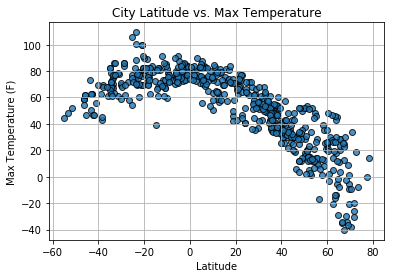

In [187]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],
           edgecolor = "black", alpha = 0.8)
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_plots/CityLat_v_MaxTemp")
plt.show()

#### Latitude vs. Humidity Plot

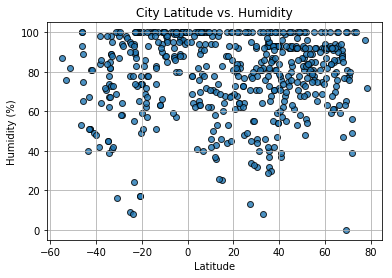

In [188]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"],
           edgecolor = "black", alpha = 0.8)
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_plots/CityLat_v_Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

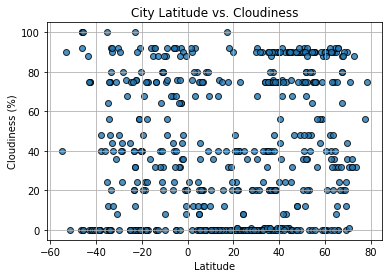

In [189]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],
           edgecolor = "black", alpha = 0.8)
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_plots/CityLat_v_Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

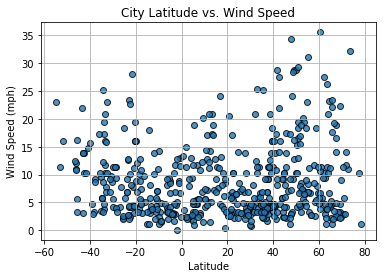

In [190]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],
           edgecolor = "black", alpha = 0.8)
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_plots/CityLat_v_WindSpeed")
plt.show()